In [75]:
from keras.datasets import cifar10
from keras import models
from keras import layers
from keras.layers import Dense
import keras.utils as ku
from keras.optimizers import RMSprop
from keras.layers.core import Activation
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt


In [76]:
# The data, split between train and test sets:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


train_images_subs= train_images[np.where(train_labels[:,0] < 3)[0],:]
train_labels_subs = train_labels[np.where(train_labels[:,0] < 3)[0],:]
test_images_subs = test_images[np.where(test_labels[:,0] < 3)[0],:]
test_labels_subs = test_labels[np.where(test_labels[:,0] < 3)[0],:]
print(train_images_subs.shape)
print(train_labels_subs.shape)
print(test_images_subs.shape)
print(test_labels_subs.shape)


(15000, 32, 32, 3)
(15000, 1)
(3000, 32, 32, 3)
(3000, 1)


In [77]:
train_labels_subs = ku.to_categorical(train_labels_subs,3)
test_labels_subs = ku.to_categorical(test_labels_subs,3)


train_images_subs= train_images_subs.astype('float')/255.0
test_images_subs = test_images_subs.astype('float')/255.0


train_val = train_images_subs[:3000]
partial_train_val = train_images_subs[3000:]
train_lab_val = train_labels_subs[:3000]
partial_train_lab_val = train_labels_subs[3000:]

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(layers.Flatten())
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer=SGD(lr=0.01,decay = 1e-6,momentum=0.9,nesterov=True),loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(
    partial_train_val,partial_train_lab_val,
    epochs=60,
    batch_size = 512,
    validation_data = (train_val,train_lab_val))

Train on 12000 samples, validate on 3000 samples
Epoch 1/60
12000/12000 [==============================] - 3s 231us/step - loss: 1.0758 - accuracy: 0.5023 - val_loss: 0.8769 - val_accuracy: 0.6517
Epoch 2/60
12000/12000 [==============================] - 2s 205us/step - loss: 0.8270 - accuracy: 0.6744 - val_loss: 0.7315 - val_accuracy: 0.7100
Epoch 3/60
12000/12000 [==============================] - 2s 208us/step - loss: 0.7137 - accuracy: 0.7145 - val_loss: 0.6547 - val_accuracy: 0.7460
Epoch 4/60
12000/12000 [==============================] - 3s 209us/step - loss: 0.6595 - accuracy: 0.7417 - val_loss: 0.6281 - val_accuracy: 0.7437
Epoch 5/60
12000/12000 [==============================] - 3s 214us/step - loss: 0.6248 - accuracy: 0.7570 - val_loss: 0.5683 - val_accuracy: 0.7740
Epoch 6/60
12000/12000 [==============================] - 3s 220us/step - loss: 0.5999 - accuracy: 0.7638 - val_loss: 0.5649 - val_accuracy: 0.7927
Epoch 7/60
12000/12000 [==============================] - 3s 21

Epoch 56/60
12000/12000 [==============================] - 3s 267us/step - loss: 0.2844 - accuracy: 0.8925 - val_loss: 0.4185 - val_accuracy: 0.8337
Epoch 57/60
12000/12000 [==============================] - 3s 262us/step - loss: 0.2857 - accuracy: 0.8927 - val_loss: 0.4089 - val_accuracy: 0.8430
Epoch 58/60
12000/12000 [==============================] - 3s 264us/step - loss: 0.2859 - accuracy: 0.8925 - val_loss: 0.4106 - val_accuracy: 0.8433
Epoch 59/60
12000/12000 [==============================] - 3s 262us/step - loss: 0.2789 - accuracy: 0.8970 - val_loss: 0.4322 - val_accuracy: 0.8293
Epoch 60/60
12000/12000 [==============================] - 3s 262us/step - loss: 0.2832 - accuracy: 0.8925 - val_loss: 0.4007 - val_accuracy: 0.8467


In [79]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


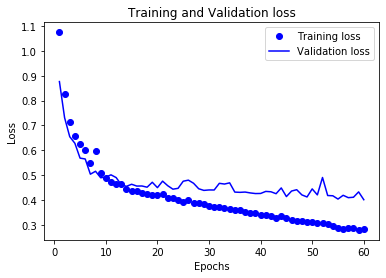

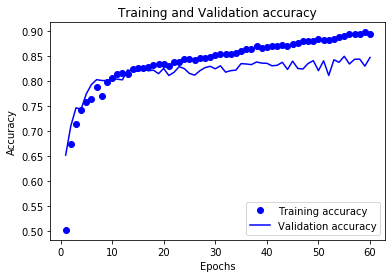

In [80]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label= 'Training loss')
plt.plot(epochs,val_loss_values, 'b', label="Validation loss")
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochss = range(1, len(acc_values) + 1)

plt.plot(epochss, acc_values, 'bo', label= 'Training accuracy')
plt.plot(epochss,val_acc_values, 'b', label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [81]:
sgd = SGD(lr=0.001,decay = 1e-6,momentum=0.9,nesterov=True)
model.compile(
    optimizer=sgd,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

history = model.fit(train_images_subs,train_labels_subs,epochs=40,batch_size=64)
results=model.evaluate(test_images_subs,test_labels_subs)
print(results)

Epoch 1/40
15000/15000 [==============================] - 3s 219us/step - loss: 0.2974 - accuracy: 0.8882
Epoch 2/40
15000/15000 [==============================] - 3s 210us/step - loss: 0.2929 - accuracy: 0.8895
Epoch 3/40
15000/15000 [==============================] - 3s 216us/step - loss: 0.2880 - accuracy: 0.8917
Epoch 4/40
15000/15000 [==============================] - 3s 220us/step - loss: 0.2858 - accuracy: 0.8916
Epoch 5/40
15000/15000 [==============================] - 3s 222us/step - loss: 0.2821 - accuracy: 0.8944
Epoch 6/40
15000/15000 [==============================] - 4s 242us/step - loss: 0.2793 - accuracy: 0.8949
Epoch 7/40
15000/15000 [==============================] - 4s 246us/step - loss: 0.2758 - accuracy: 0.8969
Epoch 8/40
15000/15000 [==============================] - 4s 234us/step - loss: 0.2731 - accuracy: 0.8983
Epoch 9/40
15000/15000 [==============================] - 4s 236us/step - loss: 0.2700 - accuracy: 0.8987
Epoch 10/40
15000/15000 [=====================

In [82]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy'])


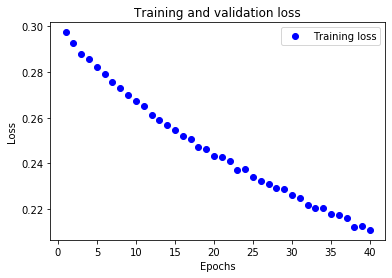

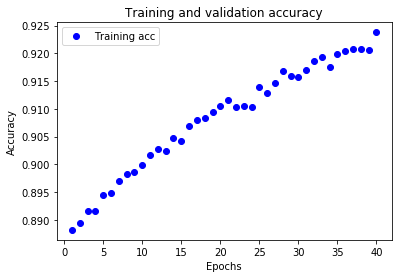

In [83]:
import matplotlib.pyplot as plt
loss = history_dict['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss') 
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['accuracy']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
# Save the model
model.save('question1.hdf5')

In [85]:
# Load the model weights
model.load_weights('question1.hdf5')

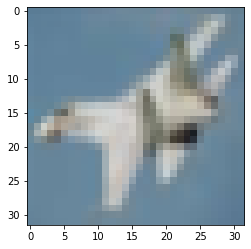

In [88]:
# Display and verify the training data
plt.imshow(test_images[10])

In [89]:
# Make a prediction
model.predict(test_images[10:11])

array([[1., 0., 0.]], dtype=float32)